- https://trello.com/c/KBbjZE02/16-dynamic-asset-allocation-market-timing

The quandl wiki bundle doesn't have SPY so I have to build my own bundle from yahoo.

In [1]:
%load_ext zipline
%pylab inline
figsize(12, 12)

Populating the interactive namespace from numpy and matplotlib


In [12]:
# %load ~/.zipline/extension.py
from zipline.data.bundles import register, yahoo_equities

# these are the tickers you would like data for
equities = {
    'SPY',
}

register(
    'yahoo-spy',  # name this whatever you like
    yahoo_equities(equities),
)

<function zipline.data.bundles.yahoo.yahoo_equities.<locals>.ingest>

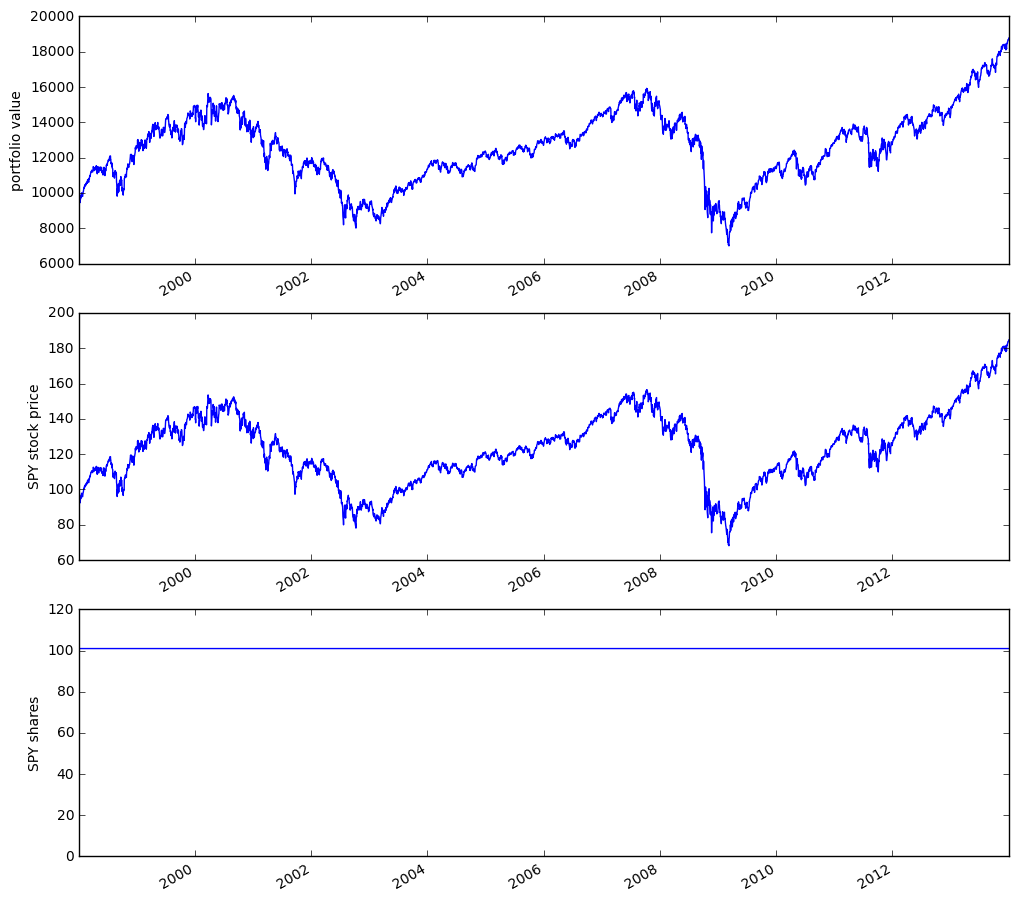

A_price  A_shares  algo_volatility  \
1998-01-02 21:00:00   97.562         0              NaN   
1998-01-05 21:00:00   97.781       101         0.001122   
1998-01-06 21:00:00   96.218       101         0.144242   
1998-01-07 21:00:00   96.468       101         0.133283   
1998-01-08 21:00:00   95.625       101         0.121402   
1998-01-09 21:00:00   92.312       101         0.221668   
1998-01-12 21:00:00   94.000       101         0.260749   
1998-01-13 21:00:00   95.312       101         0.264420   
1998-01-14 21:00:00   95.750       101         0.250573   
1998-01-15 21:00:00   94.953       101         0.238167   
1998-01-16 21:00:00   96.312       101         0.240040   
1998-01-20 21:00:00   97.875       101         0.242193   
1998-01-21 21:00:00   96.937       101         0.235738   
1998-01-22 21:00:00   96.078       101         0.229138   
1998-01-23 21:00:00   95.937       101         0.220807   
1998-01-26 21:00:00   95.875       101         0.213330   
1998-01-27 21:00:00   96.843       101         0.210934   
1998-01-28 21:00:00   97.718       101         0.207640   
1998-01-29 21:00:00   98.250       101         0.202724   
1998-01-30 21:00:00   98.312       101         0.197320   
1998-02-02 21:00:00   99.937       101         0.200141   
1998-02-03 21:00:00  100.687       101         0.196484   
1998-02-04 21:00:00  100.562       101         0.192161   
1998-02-05 21:00:00  100.500       101         0.188036   
1998-02-06 21:00:00  101.625       101         0.186724   
1998-02-09 21:00:00  101.281       101         0.183595   
1998-02-10 21:00:00  102.250       101         0.181704   
1998-02-11 21:00:00  102.156       101         0.178478   
1998-02-12 21:00:00  102.593       101         0.175433   
1998-02-13 21:00:00  102.000       101         0.173713   
...                      ...       ...              ...   
2013-11-18 21:00:00  179.419       101         0.207469   
2013-11-19 21:00:00  179.029       101         0.207444   
2013-11-20 21:00:00  178.470       101         0.207419   
2013-11-21 21:00:00  179.910       101         0.207403   
2013-11-22 21:00:00  180.809       101         0.207380   
2013-11-25 21:00:00  180.630       101         0.207354   
2013-11-26 21:00:00  180.679       101         0.207329   
2013-11-27 21:00:00  181.119       101         0.207303   
2013-11-29 18:00:00  181.000       101         0.207278   
2013-12-02 21:00:00  180.529       101         0.207253   
2013-12-03 21:00:00  179.750       101         0.207230   
2013-12-04 21:00:00  179.729       101         0.207204   
2013-12-05 21:00:00  178.940       101         0.207182   
2013-12-06 21:00:00  180.940       101         0.207174   
2013-12-09 21:00:00  181.399       101         0.207149   
2013-12-10 21:00:00  180.750       101         0.207125   
2013-12-11 21:00:00  178.720       101         0.207119   
2013-12-12 21:00:00  178.130       101         0.207095   
2013-12-13 21:00:00  178.110       101         0.207069   
2013-12-16 21:00:00  179.220       101         0.207049   
2013-12-17 21:00:00  178.649       101         0.207025   
2013-12-18 21:00:00  181.699       101         0.207041   
2013-12-19 21:00:00  181.490       101         0.207016   
2013-12-20 21:00:00  181.559       101         0.206990   
2013-12-23 21:00:00  182.529       101         0.206968   
2013-12-24 18:00:00  182.929       101         0.206943   
2013-12-26 21:00:00  183.860       101         0.206921   
2013-12-27 21:00:00  183.850       101         0.206895   
2013-12-30 21:00:00  183.820       101         0.206869   
2013-12-31 21:00:00  184.690       101         0.206847   

                     algorithm_period_return     alpha  \
1998-01-02 21:00:00                 0.000000       NaN   
1998-01-05 21:00:00                -0.000100 -0.044862   
1998-01-06 21:00:00                -0.015886 -0.979085   
1998-01-07 21:00:00                -0.013361 -0.419031   
1998-01-08 21:00:00                -0.021876 -0.380253   
1998-01-09 21:

In [17]:
%%zipline --start 1998-1-1 --end 2014-1-1 --capital-base 10000 -b yahoo-spy

import matplotlib.pyplot as plt
from zipline.api import *

def initialize(context):
    context.sid = symbol("SPY") #spy
    pass

def handle_data(context, data):
    to_buy = context.portfolio.cash // data[context.sid].price
    to_buy = to_buy - 1
    record(to_buy=to_buy)
    if (to_buy >= 0):
        order(context.sid, to_buy)
    record(A_shares=context.portfolio.positions[context.sid].amount)
    record(A_price=data[context.sid].price)
    
def analyze(context, perf):
    ax1 = plt.subplot(311)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value')
    
    ax2 = plt.subplot(312, sharex=ax1)
    perf.A_price.plot(ax=ax2)
    ax2.set_ylabel('SPY stock price')
    
    ax3 = plt.subplot(313, sharex=ax1)
    perf.A_shares.plot(ax=ax3)
    ax3.set_ylabel('SPY shares')
    
    plt.show()

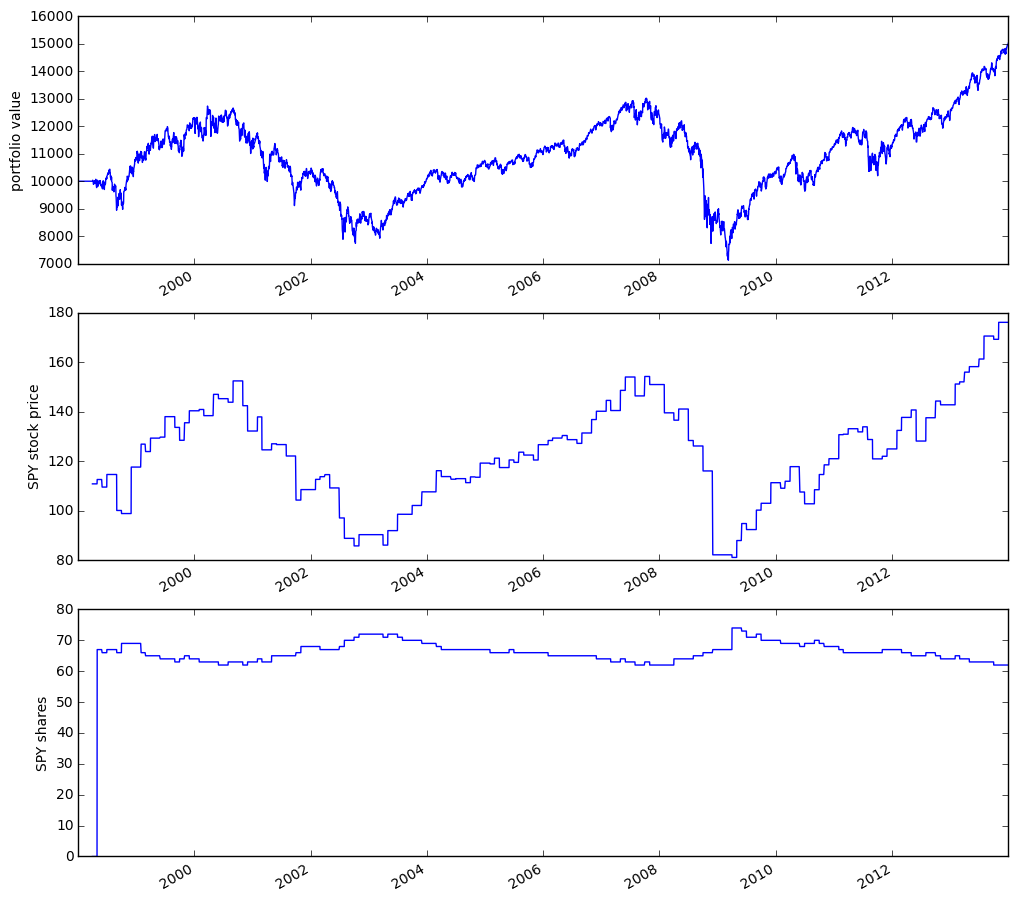

A_price  A_shares  algo_volatility  \
1998-01-02 21:00:00      NaN       NaN              NaN   
1998-01-05 21:00:00      NaN       NaN         0.000000   
1998-01-06 21:00:00      NaN       NaN         0.000000   
1998-01-07 21:00:00      NaN       NaN         0.000000   
1998-01-08 21:00:00      NaN       NaN         0.000000   
1998-01-09 21:00:00      NaN       NaN         0.000000   
1998-01-12 21:00:00      NaN       NaN         0.000000   
1998-01-13 21:00:00      NaN       NaN         0.000000   
1998-01-14 21:00:00      NaN       NaN         0.000000   
1998-01-15 21:00:00      NaN       NaN         0.000000   
1998-01-16 21:00:00      NaN       NaN         0.000000   
1998-01-20 21:00:00      NaN       NaN         0.000000   
1998-01-21 21:00:00      NaN       NaN         0.000000   
1998-01-22 21:00:00      NaN       NaN         0.000000   
1998-01-23 21:00:00      NaN       NaN         0.000000   
1998-01-26 21:00:00      NaN       NaN         0.000000   
1998-01-27 21:00:00      NaN       NaN         0.000000   
1998-01-28 21:00:00      NaN       NaN         0.000000   
1998-01-29 21:00:00      NaN       NaN         0.000000   
1998-01-30 21:00:00      NaN       NaN         0.000000   
1998-02-02 21:00:00      NaN       NaN         0.000000   
1998-02-03 21:00:00      NaN       NaN         0.000000   
1998-02-04 21:00:00      NaN       NaN         0.000000   
1998-02-05 21:00:00      NaN       NaN         0.000000   
1998-02-06 21:00:00      NaN       NaN         0.000000   
1998-02-09 21:00:00      NaN       NaN         0.000000   
1998-02-10 21:00:00      NaN       NaN         0.000000   
1998-02-11 21:00:00      NaN       NaN         0.000000   
1998-02-12 21:00:00      NaN       NaN         0.000000   
1998-02-13 21:00:00      NaN       NaN         0.000000   
...                      ...       ...              ...   
2013-11-18 21:00:00   176.21        62         0.153341   
2013-11-19 21:00:00   176.21        62         0.153323   
2013-11-20 21:00:00   176.21        62         0.153305   
2013-11-21 21:00:00   176.21        62         0.153293   
2013-11-22 21:00:00   176.21        62         0.153276   
2013-11-25 21:00:00   176.21        62         0.153257   
2013-11-26 21:00:00   176.21        62         0.153238   
2013-11-27 21:00:00   176.21        62         0.153219   
2013-11-29 18:00:00   176.21        62         0.153200   
2013-12-02 21:00:00   176.21        62         0.153182   
2013-12-03 21:00:00   176.21        62         0.153165   
2013-12-04 21:00:00   176.21        62         0.153146   
2013-12-05 21:00:00   176.21        62         0.153129   
2013-12-06 21:00:00   176.21        62         0.153124   
2013-12-09 21:00:00   176.21        62         0.153106   
2013-12-10 21:00:00   176.21        62         0.153088   
2013-12-11 21:00:00   176.21        62         0.153084   
2013-12-12 21:00:00   176.21        62         0.153066   
2013-12-13 21:00:00   176.21        62         0.153047   
2013-12-16 21:00:00   176.21        62         0.153032   
2013-12-17 21:00:00   176.21        62         0.153014   
2013-12-18 21:00:00   176.21        62         0.153028   
2013-12-19 21:00:00   176.21        62         0.153009   
2013-12-20 21:00:00   176.21        62         0.152990   
2013-12-23 21:00:00   176.21        62         0.152974   
2013-12-24 18:00:00   176.21        62         0.152955   
2013-12-26 21:00:00   176.21        62         0.152939   
2013-12-27 21:00:00   176.21        62         0.152920   
2013-12-30 21:00:00   176.21        62         0.152901   
2013-12-31 21:00:00   176.21        62         0.152884   

                     algorithm_period_return     alpha  \
1998-01-02 21:00:00                 0.000000       NaN   
1998-01-05 21:00:00                 0.000000  0.000000   
1998-01-06 21:00:00                 0.000000  0.000000   
1998-01-07 21:00:00                 0.000000  0.000000   
1998-01-08 21:00:00                 0.000000  0.000000   
1998-01-09 21:

In [16]:
%%zipline --start 1998-1-1 --end 2014-1-1 --capital-base 10000 -b yahoo-spy

# This is a simple rebalancing strategy

import matplotlib.pyplot as plt
from zipline.api import *

def initialize(context):
    context.sid = symbol("SPY") #spy

def handle_data(context, data):
    date = get_datetime()
    if date.day != 1:
        return
    
    tr_count = 0
    cash_portion = context.portfolio.portfolio_value * 0.25
    
    cash_available = context.portfolio.cash - 1
    tr_count = (cash_available - cash_portion) // (data[context.sid].price + 0.0075)
        
    order(context.sid, tr_count)

    record(A_shares=context.portfolio.positions[context.sid].amount)
    record(A_price=data[context.sid].price)
    
def analyze(context, perf):
    ax1 = plt.subplot(311)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value')
    
    ax2 = plt.subplot(312, sharex=ax1)
    perf.A_price.plot(ax=ax2)
    ax2.set_ylabel('SPY stock price')
    
    ax3 = plt.subplot(313, sharex=ax1)
    perf.A_shares.plot(ax=ax3)
    ax3.set_ylabel('SPY shares')
    
    plt.show()

The conclusion is that simply rebalaning over stocks and cash doesn't increase your return. But it would keep a minimum amount of money in the bank. These charts are annoying and the time series doesn't actually tell me much. Next step is to evaluate these strategies with pyfolio: https://github.com/quantopian/pyfolio

In [2]:
%matplotlib inline
import pyfolio as pf

import sys
import logbook
import numpy as np
from datetime import datetime
import pytz

from zipline.algorithm import TradingAlgorithm
from zipline.utils.factory import load_from_yahoo
from zipline.finance import commission

zipline_logging = logbook.NestedSetup([
    logbook.NullHandler(level=logbook.DEBUG),
    logbook.StreamHandler(sys.stdout, level=logbook.INFO),
    logbook.StreamHandler(sys.stderr, level=logbook.ERROR),
])
zipline_logging.push_application()

In [3]:
# This is a simple rebalancing strategy

import matplotlib.pyplot as plt
from zipline.api import *

def initialize(context):
    context.sid = symbol("SPY") #spy

def handle_data(context, data):
    date = get_datetime()
    if date.day != 1:
        return
    
    tr_count = 0
    cash_portion = context.portfolio.portfolio_value * 0.25
    
    cash_available = context.portfolio.cash - 1
    tr_count = (cash_available - cash_portion) // (data[context.sid].price + 0.0075)
        
    order(context.sid, tr_count)

    record(A_shares=context.portfolio.positions[context.sid].amount)
    record(A_price=data[context.sid].price)
    
start = datetime(1995, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime(2016, 1, 1, 0, 0, 0, 0, pytz.utc)

# Load price data from yahoo.
data = load_from_yahoo(stocks=["SPY"], indexes={}, start=start, end=end)
data = data.dropna()

# Create and run the algorithm.
algo = TradingAlgorithm(handle_data=handle_data, initialize=initialize)
results = algo.run(data)


[2016-10-14 04:04:27.070869] INFO: Loader: Loading stock: SPY


/Users/jcurzon/anaconda/envs/zipline/lib/python3.4/site-packages/ipykernel/__main__.py:18: ZiplineDeprecationWarning: `data[sid(N)]` is deprecated. Use `data.current`.
/Users/jcurzon/anaconda/envs/zipline/lib/python3.4/site-packages/ipykernel/__main__.py:23: ZiplineDeprecationWarning: `data[sid(N)]` is deprecated. Use `data.current`.


[2016-10-14 04:05:00.039467] INFO: Performance: Simulated 5288 trading days out of 5288.
[2016-10-14 04:05:00.040002] INFO: Performance: first open: 1995-01-03 14:31:00+00:00
[2016-10-14 04:05:00.040469] INFO: Performance: last close: 2015-12-31 21:00:00+00:00


Entire data start date: 1998-01-02
Entire data end date: 2015-12-31


Backtest Months: 215
                   Backtest
annual_return          0.04
annual_volatility      0.15
sharpe_ratio           0.35
calmar_ratio           0.09
stability              0.60
max_drawdown          -0.44
omega_ratio            1.07
sortino_ratio          0.49
skewness               0.09
kurtosis               8.35
information_ratio     -0.03
alpha                 -0.01
beta                   0.73

Worst Drawdown Periods
   net drawdown in %  peak date valley date recovery date duration
0              44.37 2007-10-09  2009-03-09    2012-03-13     1156
1              37.85 2000-03-24  2002-10-09    2006-10-16     1712
3              14.38 1998-07-20  1998-08-31    1998-11-23       91
2               8.98 2015-07-20  2015-08-25           NaT      NaN
4               5.50 2014-09-18  2014-10-16    2014-10-31       32


2-sigma returns daily    -0.019
2-sigma returns weekly   -0.035
dtype: float64


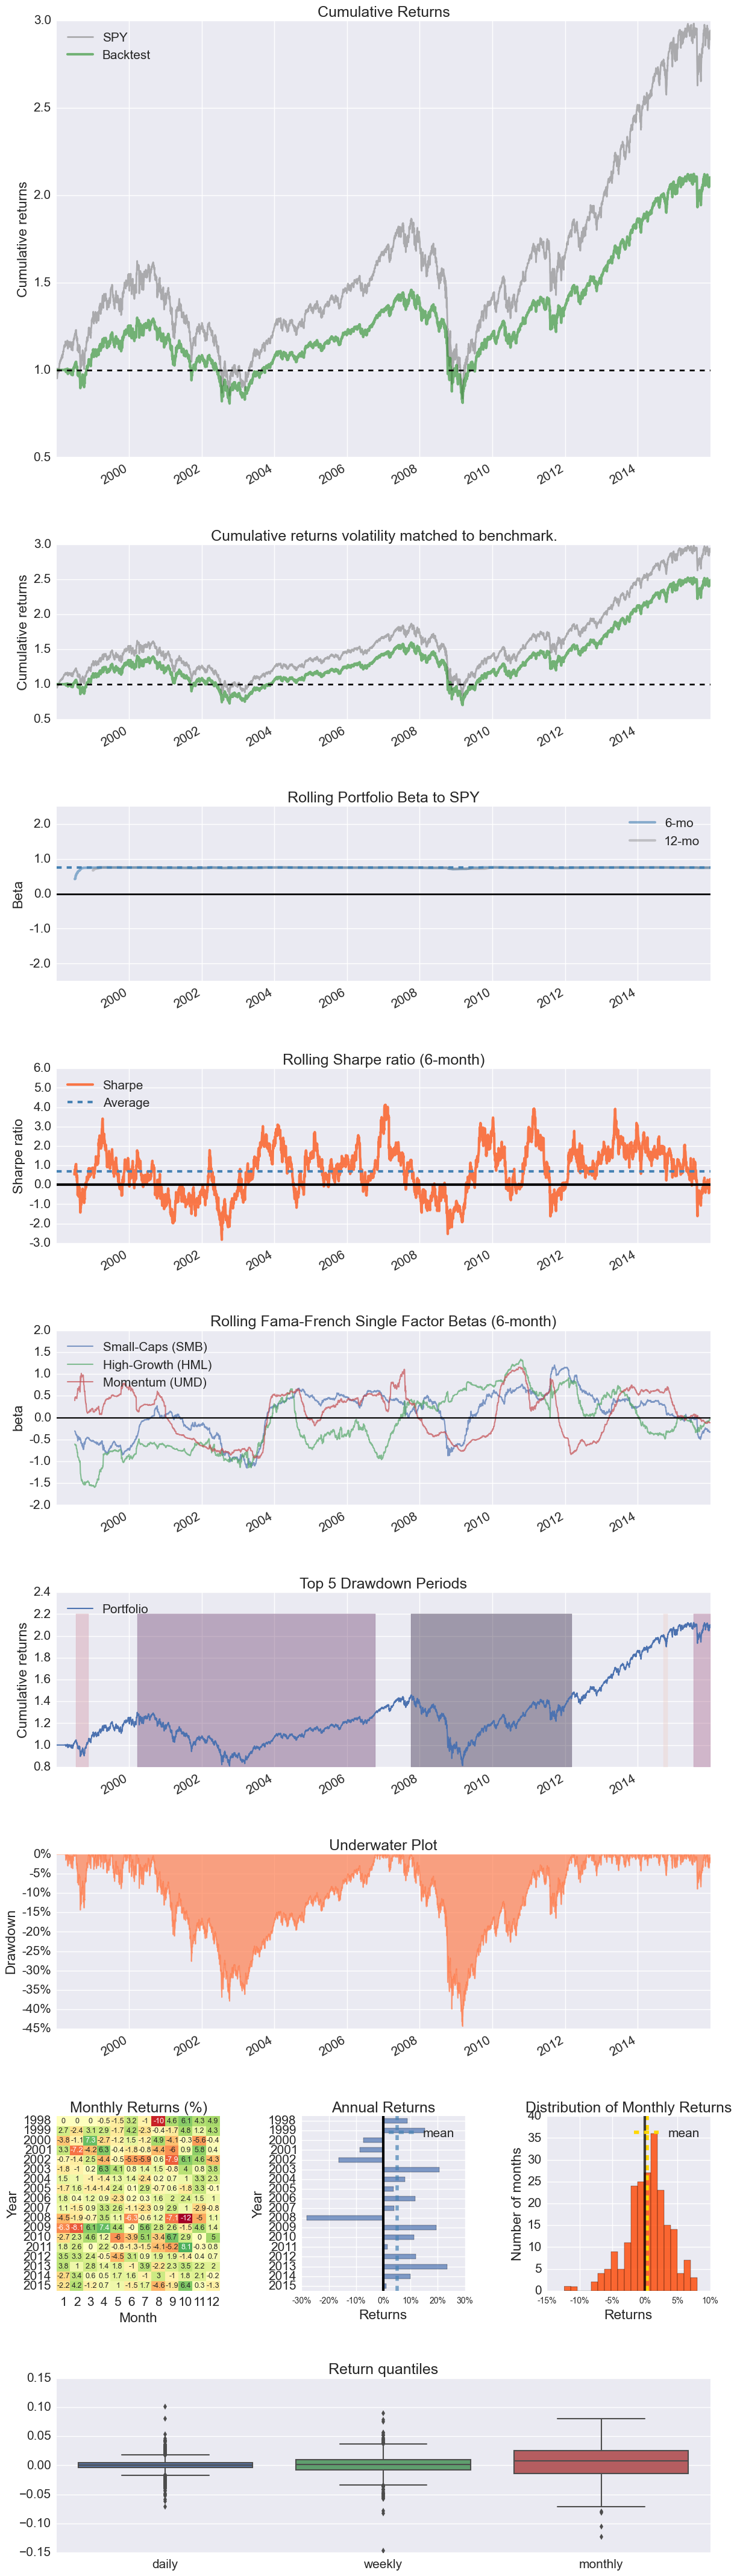


Stress Events
                                    mean    min    max
Dotcom                             0.000 -0.043  0.035
Lehmann                           -0.001 -0.058  0.030
9/11                               0.000 -0.038  0.025
US downgrade/European Debt Crisis -0.000 -0.048  0.034
Fukushima                          0.001 -0.014  0.012
US Housing                        -0.004 -0.020  0.014
EZB IR Event                      -0.000 -0.008  0.012
Aug07                              0.000 -0.022  0.015
Mar08                              0.001 -0.018  0.030
Sept08                            -0.003 -0.058  0.030
2009Q1                            -0.004 -0.040  0.032
2009Q2                             0.003 -0.033  0.053
Flash Crash                       -0.002 -0.025  0.033
Apr14                              0.000 -0.016  0.008
Oct14                              0.001 -0.015  0.015
Fall2015                          -0.002 -0.031  0.028
Low Volatility Bull Market         0.000 -0.029  0

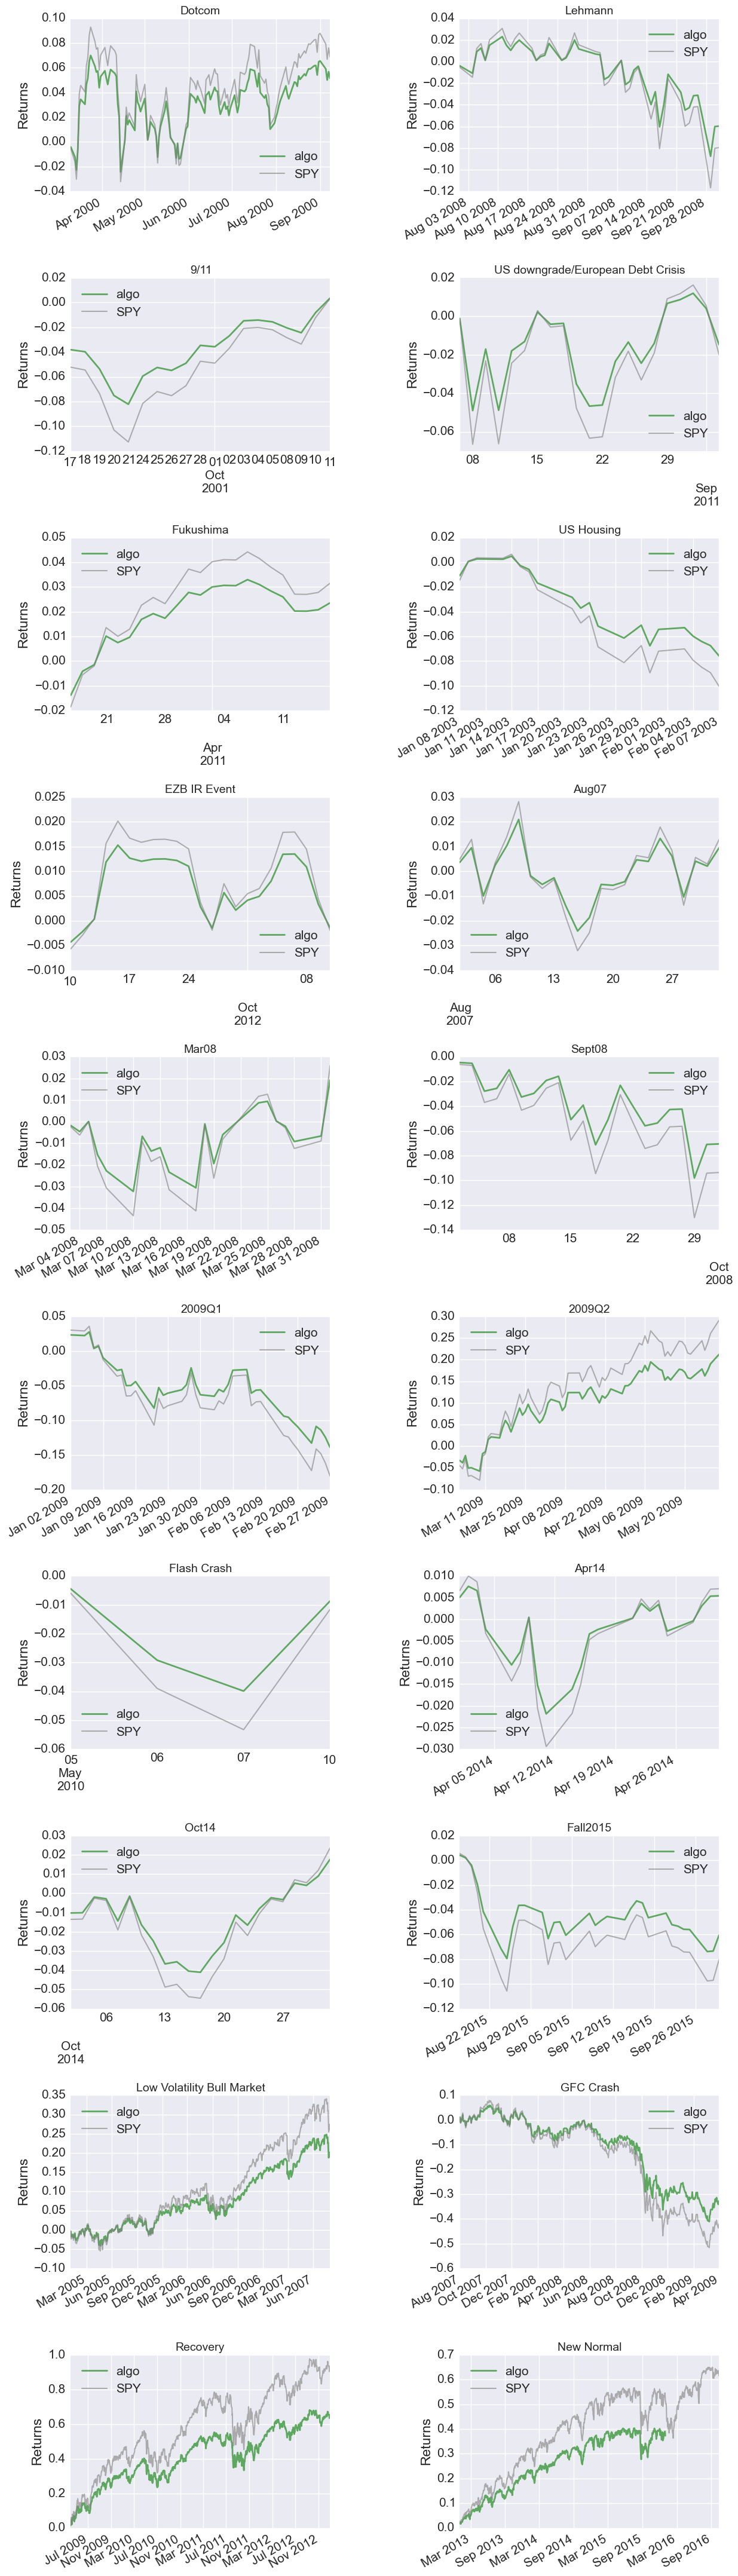



Top 10 long positions of all time (and max%)
[ Equity(0, symbol='SPY', asset_name='', exchange='TEST', start_date=Timestamp('1998-01-02 00:00:00+0000', tz='UTC'), end_date=Timestamp('2015-12-31 00:00:00+0000', tz='UTC'), first_traded=None, auto_close_date=None, exchange_full='TEST FULL')]
[ 0.784]


Top 10 short positions of all time (and max%)
[]
[]


Top 10 positions of all time (and max%)
[ Equity(0, symbol='SPY', asset_name='', exchange='TEST', start_date=Timestamp('1998-01-02 00:00:00+0000', tz='UTC'), end_date=Timestamp('2015-12-31 00:00:00+0000', tz='UTC'), first_traded=None, auto_close_date=None, exchange_full='TEST FULL')]
[ 0.784]


All positions ever held
[ Equity(0, symbol='SPY', asset_name='', exchange='TEST', start_date=Timestamp('1998-01-02 00:00:00+0000', tz='UTC'), end_date=Timestamp('2015-12-31 00:00:00+0000', tz='UTC'), first_traded=None, auto_close_date=None, exchange_full='TEST FULL')]
[ 0.784]




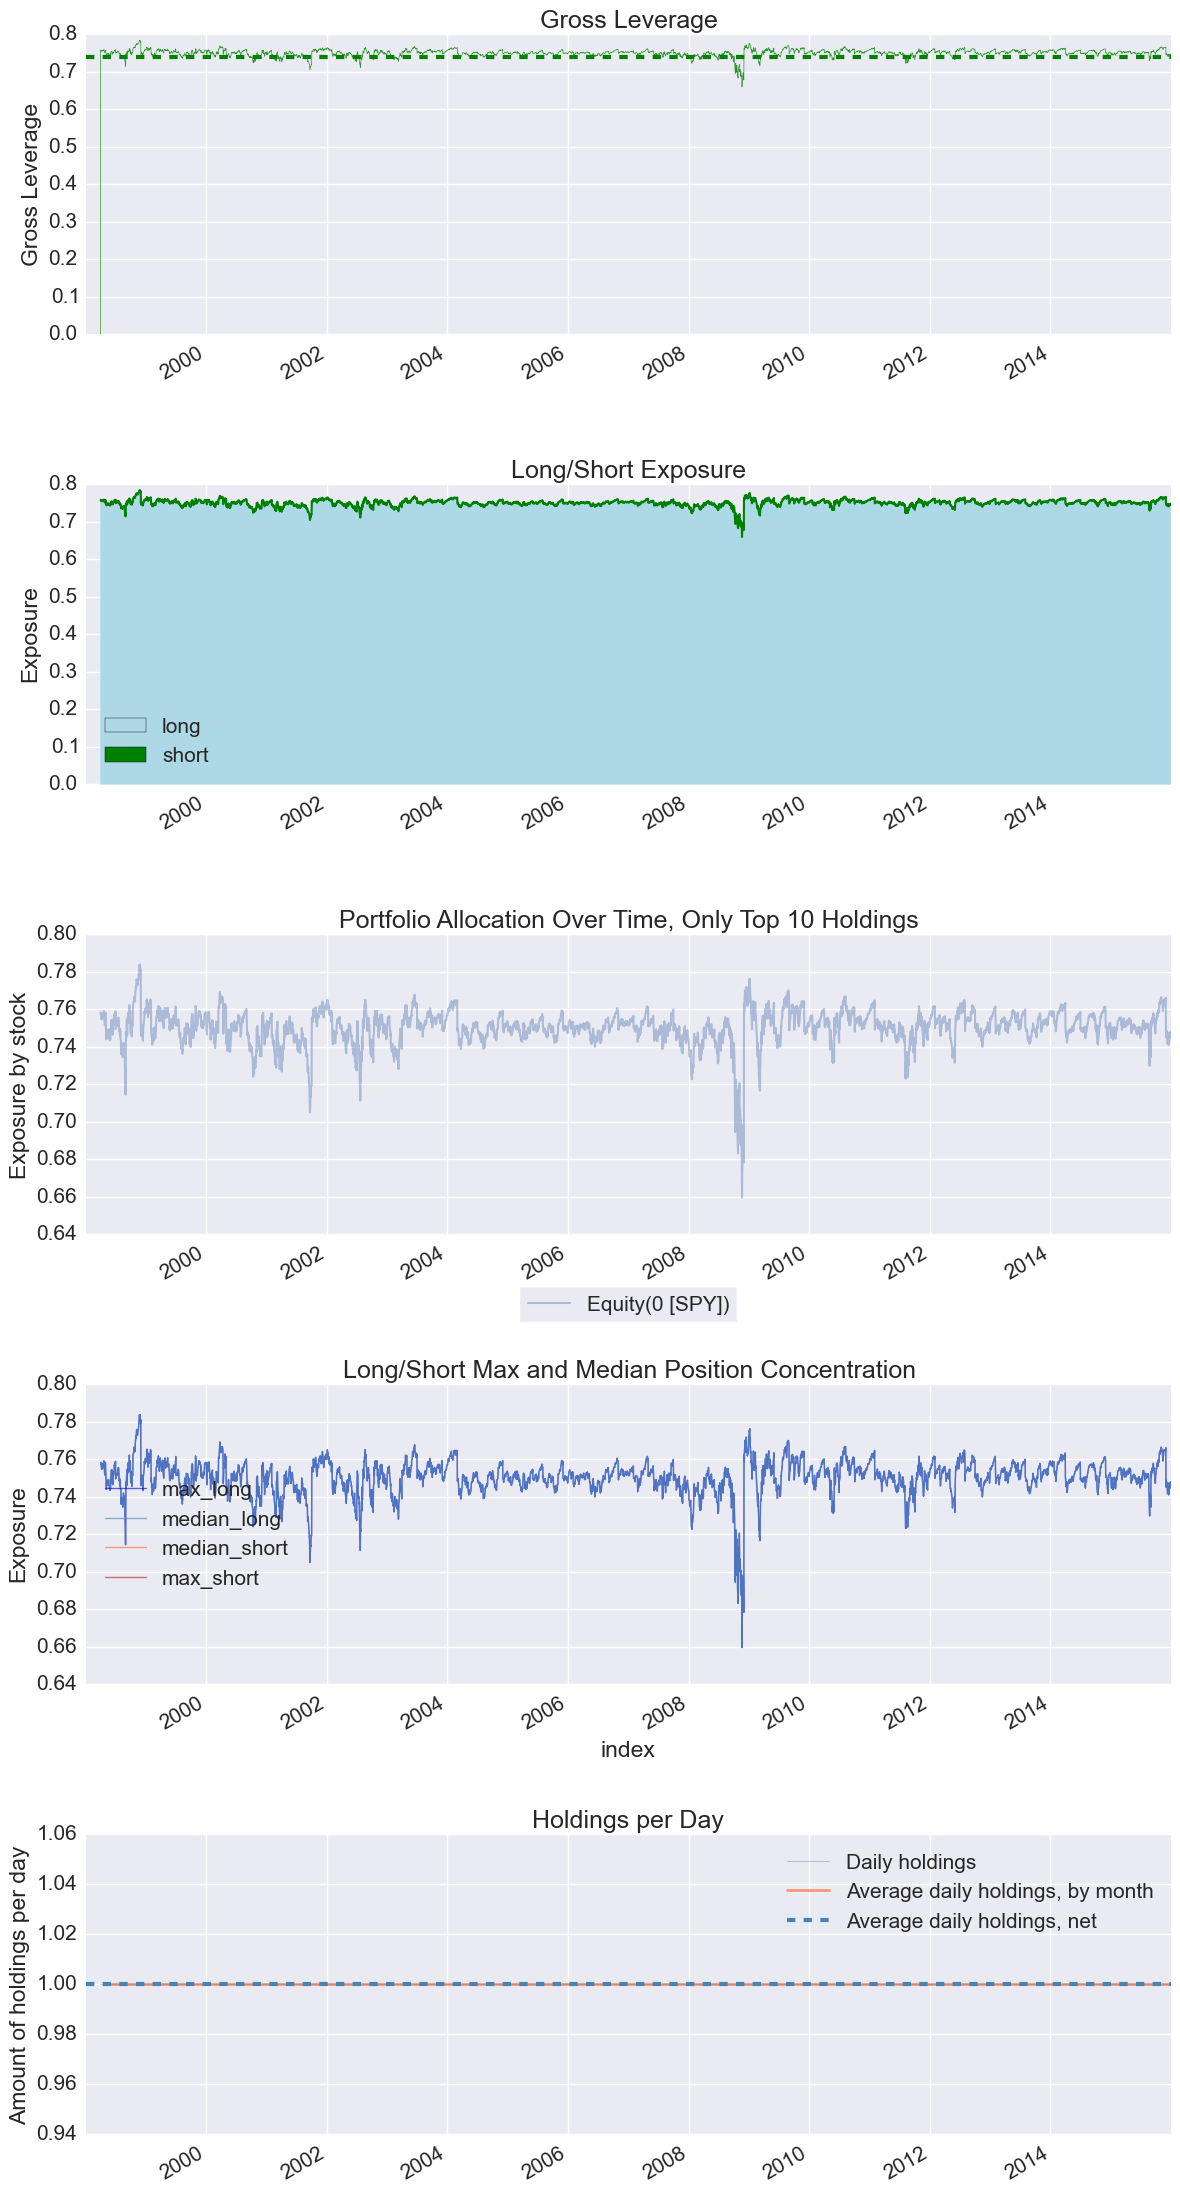

In [ ]:
returns, positions, transactions, gross_lev = pf.utils.extract_rets_pos_txn_from_zipline(results)

pf.create_full_tear_sheet(returns, positions=positions,
                          transactions=transactions, gross_lev=gross_lev, round_trips=True)

- http://www.bsam.com/2016/07/25/proper-benchmark-momentum-trend-following-strategies/
- https://www.quantopian.com/posts/quick-and-dirty-momentum-strategy